## **Objective:** To classify the sentiment of tweets into one of the three categories : positive , negative ,  neural

### Data description


*   Source - Twitter: coming from a project on Kaggle
*   Description: passengers tweets about airline performance, having sentiments about their journey



## Learning Outcomes:


*   Text based EDA
*   Basic understanding of text pre-processing
*   What to do after text pre-processing
    * Bag of words
    * tF-idf
*   Build the classification model
*   Tune and Evaluate the Model performance


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
import re, string, unicodedata   # import Regex, String, Unicodedata
import contractions
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import nltk   # import Natural Lanuage tool kit

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                        # import Stopwords
from nltk.tokenize import word_tokenize, sent_tokenize   # import Tokenizer
from nltk.stem import WordNetLemmatizer                  # import Lemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load the data into Pandas DataFrame

In [ ]:
data = pd.read_csv('/kaggle/input/tweets/Tweets.csv')

In [ ]:
data.sample(2).T

,7706,2274
tweet_id,569330095644659712,569281144186908672
airline_sentiment,positive,negative
airline_sentiment_confidence,1.0,0.6565
negativereason,NaN,Can't Tell
negativereason_confidence,NaN,0.3539
airline,Delta,United
airline_sentiment_gold,NaN,NaN
name,aliashmia,ZachAlpert
negativereason_gold,NaN,NaN
retweet_count,0,0


### Identifying the missing values

In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
(data.isnull().sum()/data.shape[0])* 100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

### EDA

In [ ]:
data.shape

(14640, 15)

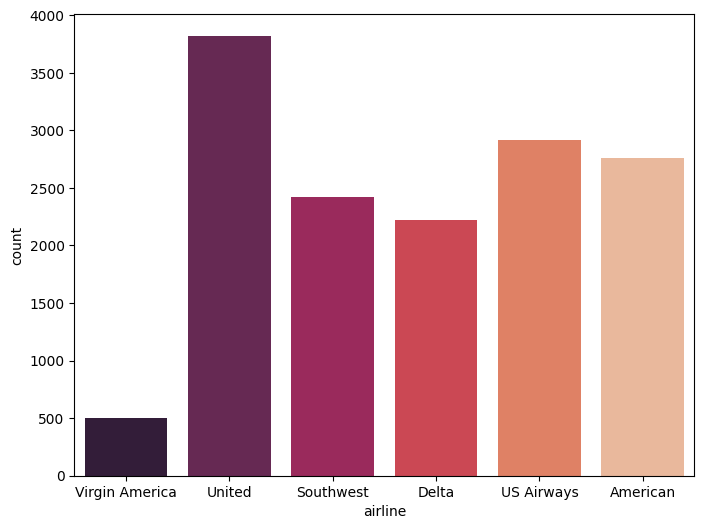

In [ ]:
### Percentage of tweets by airline companies
plt.subplots(figsize=(8,6))
sns.countplot(data = data, x = 'airline', palette = "rocket")
plt.show()

In [ ]:
### United Airlines has highest no. of tweets followed by US Airways

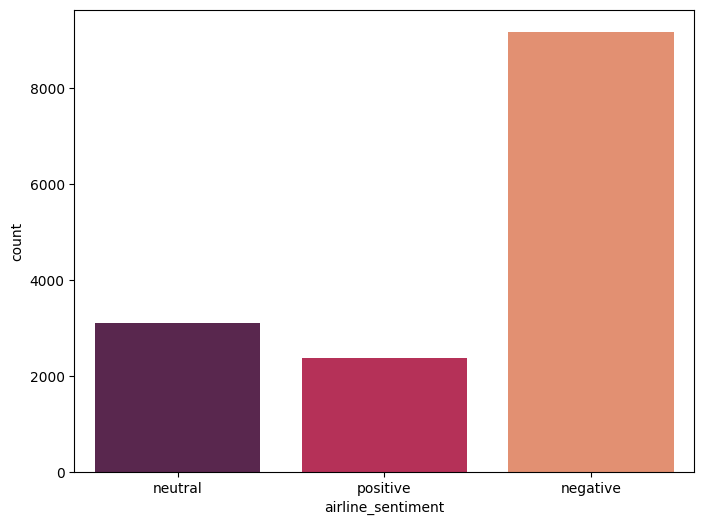

In [ ]:
# Distributions of classes / sentiments across all tweets

plt.subplots(figsize=(8,6))
sns.countplot(data = data, x = 'airline_sentiment', palette = "rocket")
plt.show()

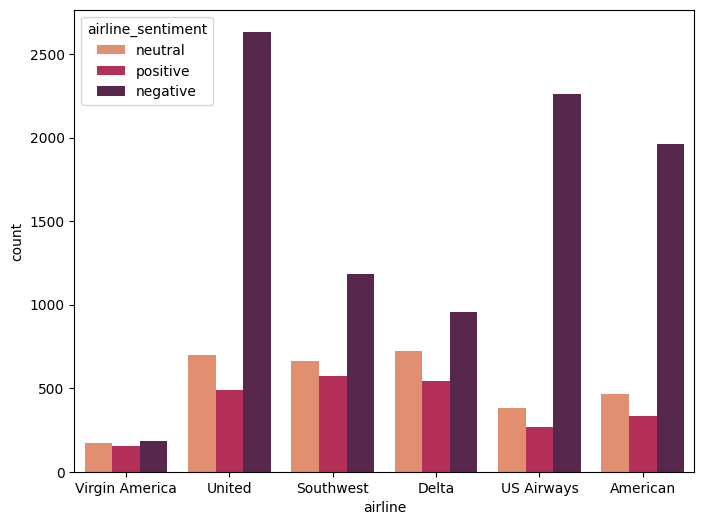

In [ ]:
# Now airline wise distribution of Sentiments
plt.figure(figsize=(8,6))
sns.countplot(data = data, x = 'airline', hue = 'airline_sentiment', palette = "rocket_r")
plt.show()

In [ ]:
# United airlines, US airways, American airlines have comparitively highest number of negative comments within themselves

In [ ]:
# Some negative tweets

data[data['airline_sentiment'] == 'negative']['text'].sample(10).tolist()

['@SouthwestAir not if its travel Credit you used to buy and it expires on the day you find a lower rate',
 '@USAirways @PhilaCarService looks like a long trip from cancun to philly? 9 hours Late Flight? Seriously?',
 "@united it's almost like we're punished for living near a large metro area. EWR was top ranked for domestic delays. Not good",
 '@AmericanAir your maint delay left us stuck in den!! Flight 1080.  Been on plane for 7 hrs.  Stop flying broke french planes!',
 "@VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems 😢",
 '@united i will never fly with you again. i went on vacation this week and you lost my bags both ways. now i have no clothes. thankyou',
 '@USAirways i have been patient.. especially the first time. i will never fly with you again',
 "@USAirways there's over 50 people in line and only one agent!",
 '@SouthwestAir why the delay on Flight 423 BDL to MCO? Need to

In [ ]:
data[data['airline_sentiment'] == 'negative'].sample(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1586,569654749055864832,negative,1.0000,Customer Service Issue,0.6756,United,NaN,onemanvariety,NaN,0,@united I don't know my flight details bc I ne...,NaN,2015-02-22 16:27:30 -0800,"driving, probably",Quito
4326,570309156290367488,negative,1.0000,longlines,0.6624,Southwest,NaN,thisradlove,NaN,0,@SouthwestAir still waiting. Just hit one hour.,NaN,2015-02-24 11:47:53 -0800,Today I'm in: Maryland,Atlantic Time (Canada)
9462,569923163259318274,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,electromail,NaN,0,"@USAirways Aye, and nothing to do with an auto...",NaN,2015-02-23 10:14:05 -0800,Watching @Interpol somewhere,Amsterdam
2024,569469326547222528,negative,0.6811,Late Flight,0.6811,United,NaN,jlongoria21,NaN,0,@united since I have an international connecti...,NaN,2015-02-22 04:10:42 -0800,"Rio Grande Valley, Texas",Central Time (US & Canada)
14045,569674237079744512,negative,1.0000,Cancelled Flight,0.3610,American,NaN,realtmh,NaN,0,@AmericanAir my #Navy sisters flight 2470 canc...,NaN,2015-02-22 17:44:56 -0800,Dallas,NaN
1854,569554815539290112,negative,1.0000,Late Flight,1.0000,United,NaN,mitchheard,NaN,0,@united this 2 hr delay is a vacation buzzkill,NaN,2015-02-22 09:50:24 -0800,"Austin, TX",Central Time (US & Canada)
9051,570267781859557377,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,JenRomanoff,NaN,0,@USAirways but I've been trying to call them s...,NaN,2015-02-24 09:03:28 -0800,NaN,Eastern Time (US & Canada)
12460,570179236633432065,negative,1.0000,Bad Flight,0.6837,American,NaN,SamuelMondo,NaN,0,@AmericanAir is it right to provide faulty sea...,NaN,2015-02-24 03:11:38 -0800,Manchester,London
7282,569693923183972352,negative,1.0000,Can't Tell,1.0000,Delta,NaN,charlotteparler,NaN,0,@JetBlue But not reddit? I work for the site a...,NaN,2015-02-22 19:03:10 -0800,Brooklyn NY.,Central Time (US & Canada)
3224,568584434376577024,negative,1.0000,Customer Service Issue,1.0000,United,NaN,takwind_,NaN,1,"@united Doumented via link. However, now that ...",NaN,2015-02-19 17:34:27 -0800,New York | Nomad,Eastern Time (US & Canada)


In [ ]:
# Some positive tweets

data[data['airline_sentiment'] == 'positive'].sample(10)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
5139,569312734896136193,positive,0.6680,NaN,0.0,Southwest,NaN,Sluggohill,NaN,0,@SouthwestAir Thanks for making good on @Potee...,NaN,2015-02-21 17:48:27 -0800,Columbus OH,NaN
7206,569889139593646080,positive,1.0000,NaN,NaN,Delta,NaN,maite_rodrgz,NaN,0,@JetBlue thanks! Calling right now!,NaN,2015-02-23 07:58:53 -0800,Puerto Rico,Hawaii
6733,567713338873118722,positive,0.6803,NaN,0.0,Southwest,NaN,DaxJeter,NaN,0,@SouthwestAir thanks do yall expect to be oper...,NaN,2015-02-17 07:53:02 -0800,"Nashville,TN",NaN
9658,569752107730890752,positive,0.6849,NaN,NaN,US Airways,NaN,DavidHall1981,NaN,0,"@USAirways @landonschott he's fine, he really ...",NaN,2015-02-22 22:54:22 -0800,"Adelaide, South Australia",Adelaide
1998,569483390581383168,positive,1.0000,NaN,NaN,United,NaN,houckie,NaN,0,@united thank you for flying me out of the mes...,NaN,2015-02-22 05:06:35 -0800,Northern Virginia,Eastern Time (US & Canada)
999,569969952654028800,positive,1.0000,NaN,NaN,United,NaN,herma48852,NaN,0,@united Pleased to be a Premier Platinum,NaN,2015-02-23 13:20:00 -0800,NaN,NaN
7226,569867719874650112,positive,1.0000,NaN,NaN,Delta,NaN,ctpeifer,NaN,0,@JetBlue great to see the RedSox plane and you...,NaN,2015-02-23 06:33:46 -0800,NYC/Austin,NaN
7524,569543615862722561,positive,1.0000,NaN,NaN,Delta,NaN,KShay1985,NaN,0,@JetBlue thank you. We are finally at the gate.,NaN,2015-02-22 09:05:54 -0800,"New York City, NY",NaN
6218,568113383242911744,positive,1.0000,NaN,NaN,Southwest,NaN,jdaniels1974,NaN,0,@SouthwestAir thanks for the follow up. I app...,"[38.97681463, -76.50266928]",2015-02-18 10:22:40 -0800,NaN,NaN
10453,569289098944507904,positive,1.0000,NaN,NaN,US Airways,NaN,MarciDunnagan,NaN,0,@USAirways Thank you for your help today. I h...,NaN,2015-02-21 16:14:32 -0800,"Boston, MA",Hawaii


In [ ]:
# Some neutral tweets

data[data['airline_sentiment'] == 'neutral'].sample(10)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
10609,569128660101427200,neutral,0.6947,NaN,0.0,US Airways,NaN,ErinPlocica,NaN,0,@USAirways we're glad to hear it. Out of curio...,NaN,2015-02-21 05:37:01 -0800,"Nürnberg, Germany",NaN
5844,568555484589871105,neutral,0.6871,NaN,NaN,Southwest,NaN,itsjessme_,NaN,0,@SouthwestAir Any way you can help with entry ...,NaN,2015-02-19 15:39:25 -0800,NaN,Alaska
441,568054702635483136,neutral,0.6477,NaN,0.0,Virgin America,NaN,opteyemisg,NaN,0,@VirginAmerica can we make every VX plane with...,NaN,2015-02-18 06:29:29 -0800,NaN,Central Time (US & Canada)
10186,569499262855331840,neutral,1.0000,NaN,NaN,US Airways,NaN,BritalmegChris,NaN,0,@USAirways one question. Can I book one way ti...,NaN,2015-02-22 06:09:39 -0800,NaN,NaN
8949,567727490567639041,neutral,1.0000,NaN,NaN,Delta,NaN,kbosspotter,NaN,0,"@JetBlue I have a internal bleed in my foot, a...",NaN,2015-02-17 08:49:16 -0800,Logan International Airport,Atlantic Time (Canada)
2800,568894256070287360,neutral,1.0000,NaN,NaN,United,NaN,jayfalck,NaN,0,"@united FYI, went through this on similar flig...",NaN,2015-02-20 14:05:34 -0800,"Austin, TX",Central Time (US & Canada)
7929,568967907042037761,neutral,1.0000,NaN,NaN,Delta,NaN,DKHurts,NaN,0,@JetBlue 😭 I used points can I get them back i...,NaN,2015-02-20 18:58:14 -0800,Brooklyn!,NaN
6705,567727499367682048,neutral,1.0000,NaN,NaN,Southwest,NaN,city2countryTN,NaN,0,@SouthwestAir do you think the flights out of ...,NaN,2015-02-17 08:49:18 -0800,TN,NaN
1934,569514124490579969,neutral,0.6365,NaN,0.0,United,NaN,roryfreeman87,NaN,0,@united with about 25 people trying to get on ...,"[29.98872603, -95.3384666]",2015-02-22 07:08:42 -0800,california,Central Time (US & Canada)
9020,570280852791422976,neutral,0.6421,NaN,0.0,US Airways,NaN,mdendas,NaN,0,@USAirways where is your email address? Its no...,NaN,2015-02-24 09:55:25 -0800,NaN,Eastern Time (US & Canada)


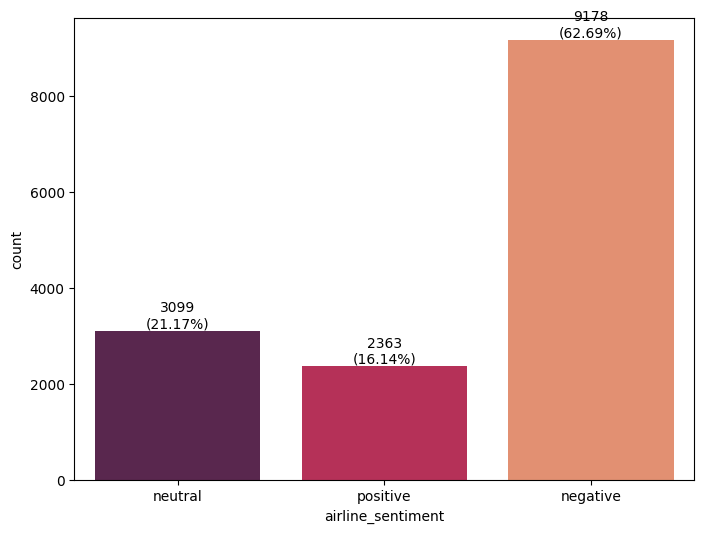

In [ ]:
# Percentage of classes / sentiments across all tweets

plt.subplots(figsize=(8,6))
ax = sns.countplot(data = data, x = 'airline_sentiment', palette = "rocket")

# calculate total count of percentage calculation
total = len(data)

# annotate bars with count and percentage
for p in ax.patches:
  count = int(p.get_height()) # get the height of each bar (count)
  percentage = round(100 * count / total, 2) # calculate the percentage
  x = p.get_x() + p.get_width() / 2 # get the x-coordinate of the bar center
  y = p.get_height() # get the height of the bar
  ax.annotate(f'{count}\n({percentage}%)', (x, y), ha='center', va='bottom')
plt.show()

In [ ]:
# negative tweets have highest percentage (63%) , followed by neutral ones (21%) and then positive ones (16%) appx.


In [ ]:
data.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

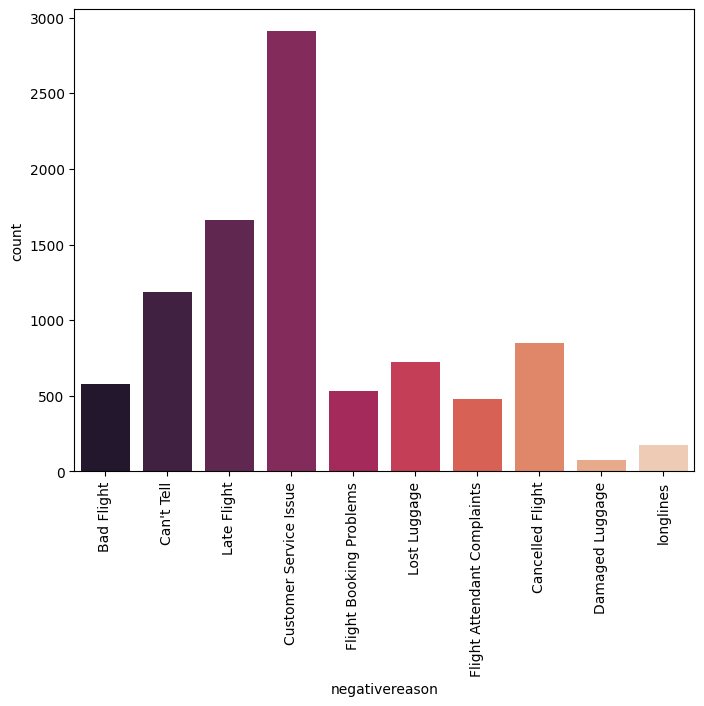

In [ ]:
# negative reasons
plt.figure(figsize=(8,6))
sns.countplot(data = data[data['airline_sentiment'] == 'negative'], x = 'negativereason', palette="rocket")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# customer service is the top reason for negative sentiment

In [ ]:
## word cloud for negative tweets

In [ ]:
from wordcloud import WordCloud, STOPWORDS
neg_df = data[data['airline_sentiment'] == 'negative'] # filtered for negative sentiments
words = ' '.join(neg_df['text']) # combines all the tweets stored in the column 'text' where each tweet is sepearted by space

In [ ]:
type(words) # is string

str

In [ ]:
len(words)

1054991

### Data Preprocessing Steps

- Remove html tages
- Replace contractions in strings (e.g. replace I'm --> I am)
- Remove numbers
- Tokenization
- To remove Stopwords
- Lemmatization


In [ ]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [ ]:
## Remove 'html' tags

def remove_html(text):
  soup = BeautifulSoup(text,'html.parser')
  return soup.get_text()

data['text'] = data['text'].apply(lambda x: remove_html(x))

<ipython-input-32-c64d72f6844b>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,'html.parser')


In [ ]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [ ]:
para = "I'll tell that'll world we don't have much time so it ain't happening and also we're trynna"
print(contractions.fix(para))

I will tell that will world we do not have much time so it are not happening and also we are trynna


In [ ]:
## Replacing the contractions in the text

def replace_contractions(text):
  '''
  replace contractions in string of text
  '''
  return contractions.fix(text)

data['text'] = data['text'].apply(lambda x:replace_contractions(x))
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, Length: 14640, dtype: object

In [ ]:
## Removing numbers

def remove_numbers(text):
  pattern = re.compile(r'\d+') # \d means digit and + signifies 1 or more digits
  return pattern.sub('', text)

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  people so we need  know ...
Name: text, Length: 14640, dtype: object

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you have added commercials...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I did not today... Must mean I ...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it is really aggressive to blas...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it is a really big bad thin...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Tokenization

We'll split the text into individual units such as words or tokens

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# lowercasing everything
data['text'] = data['text'].str.lower()

In [ ]:
data['text'][55]

'@virginamerica hi! i am so excited about your $ lga->dal deal- but i have been trying  book since last week & the page never loads. thanks!'

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Remove stop words

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  new_words = []
  for word in text.split():
    if word not in stop_words:
      new_words.append(word)
  return " ".join(new_words)

data['text'] = data['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
data['text'][55]

'@virginamerica hi! excited $ lga->dal deal- trying book since last week & page never loads. thanks!'

In [ ]:
# tokenization
# data['text'] = data['text'].apply(lambda x: word_tokenize(x))

In [ ]:
data['text'][55]

'@virginamerica hi! excited $ lga->dal deal- trying book since last week & page never loads. thanks!'

In [ ]:
# Remove Punctuations
import re

# Remove punctuation using regex
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

data['text']

0                              virginamerica dhepburn said
1        virginamerica plus added commercials experienc...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minutes late flight warnin...
14637    americanair please bring american airlines bla...
14638    americanair money change flight answer phones ...
14639    americanair people need know many seats next f...
Name: text, Length: 14640, dtype: object

In [ ]:
data['text'][55]

'virginamerica hi excited  lgadal deal trying book since last week  page never loads thanks'

In [ ]:
# tokenized_text = ["hello", ",", "world", "!", "how", "are", "you", "?"]
# clean_text = remove_punctuations(tokenized_text)
# print(clean_text)

In [ ]:
# Lemmatization
lemmatizer  = WordNetLemmatizer()
def lemmatize_tokens(text):
    return " ".join([lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])


In [ ]:
data['text'][55]

'virginamerica hi excited  lgadal deal trying book since last week  page never loads thanks'

In [ ]:
# Example text data

texts = [
    "I love machine learning learning","machine learning is fun","I enjoy learning"
]

In [ ]:
print(texts)

['I love machine learning learning', 'machine learning is fun', 'I enjoy learning']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_features = 100) # initialized max # parameters to 100
## fit and transform the text data
data_features_2 = count_vec.fit_transform(texts)

In [ ]:
print(data_features_2.toarray())

[[0 0 0 2 1 1]
 [0 1 1 1 0 1]
 [1 0 0 1 0 0]]


In [ ]:
## output the results
print("Vocabulary ", count_vec.get_feature_names_out())

Vocabulary  ['enjoy' 'fun' 'is' 'learning' 'love' 'machine']


In [ ]:
print("Data features array\n", data_features_2.toarray())

Data features array
 [[0 0 0 2 1 1]
 [0 1 1 1 0 1]
 [1 0 0 1 0 0]]


In [ ]:
data['text'] = data['text'].astype(str)  # Convert to string
data['text']

0                              virginamerica dhepburn said
1        virginamerica plus added commercials experienc...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minutes late flight warnin...
14637    americanair please bring american airlines bla...
14638    americanair money change flight answer phones ...
14639    americanair people need know many seats next f...
Name: text, Length: 14640, dtype: object

In [ ]:
type(data['text'])

pandas.core.series.Series

In [ ]:
Count_vec = CountVectorizer(max_features = 5000) # keeping top 5000 most frequent words
data_features = Count_vec.fit_transform(data['text'])

In [ ]:
data_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_features.shape

(14640, 5000)

In [ ]:
data['text'].shape

(14640,)

In [ ]:
print("Vocabulary: ", list(Count_vec.get_feature_names_out()))

Vocabulary:  ['aa', 'aaba', 'aadfw', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'aas', 'ab', 'abc', 'ability', 'able', 'aboard', 'about', 'abq', 'absolute', 'absolutely', 'absurd', 'abused', 'abysmal', 'ac', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accident', 'accidentally', 'accommodate', 'accommodated', 'accommodating', 'accommodations', 'accomplished', 'according', 'accordingly', 'account', 'accountability', 'accounts', 'accurate', 'acknowledge', 'acknowledgment', 'acquisition', 'across', 'act', 'action', 'actions', 'active', 'actual', 'actually', 'ad', 'add', 'added', 'adding', 'addition', 'additional', 'address', 'addressed', 'adds', 'addtl', 'admiral', 'admirals', 'admit', 'adopting', 'ads', 'advance', 'advantage', 'advertise', 'advertising', 'advice', 'advise', 'advised', 'advisory', 'affected', 'afford', 'affordable', 'after', 'afternoon', 'again', 'age', 'agency', 'agent', 'agents', 'ages', 'aggressive', 'ago', 'agree', 'agt', 'ah', 'ahead', 'ahh

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X = data_features.toarray()
y = label_encoder.fit_transform(data['airline_sentiment'])

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [ ]:
data['text'][55], y[55]

('virginamerica hi excited  lgadal deal trying book since last week  page never loads thanks',
 0)

In [ ]:
print(dict(enumerate(label_encoder.classes_)))

{0: 'negative', 1: 'neutral', 2: 'positive'}


In [ ]:
# Using Random Forest Model to build the model for classification of tweets (sentiments classification)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, n_jobs = 4)

# Training the model
rf_trained = rf.fit(X_train,y_train)

In [ ]:
rf_trained

RandomForestClassifier(n_estimators=10, n_jobs=4)

In [ ]:
print(np.mean(cross_val_score(rf,X,y,cv=5)))

0.6872950819672131


In [ ]:
## generating accuracy on test set
print(rf_trained.score(X_test,y_test))

0.7481785063752276


## Using LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
# ohe
from tensorflow.keras.utils import to_categorical
import numpy as np


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

(10248, 5000, 1)
(10248, 3)


In [ ]:
#model building
model = Sequential()

# LSTM layer
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))

# second LSTM layer
model.add(LSTM(64, activation='tanh', return_sequences=False))
model.add(Dropout(0.3))

# fully connected layer
model.add(Dense(64, activation='relu'))

# output layer (3 classes -> Softmax)
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5000, 64)            │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5000, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,275 (212.01 KB)

 Trainable params: 54,275 (212.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_train[5]

array([0., 0., 1.])

In [ ]:
# training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
321/321 ━━━━━━━━━━━━━━━━━━━━ 136s 412ms/step - accuracy: 0.6178 - loss: 0.9943 - val_accuracy: 0.6407 - val_loss: 0.8996
Epoch 2/5
321/321 ━━━━━━━━━━━━━━━━━━━━ 131s 410ms/step - accuracy: 0.6205 - loss: 0.9261 - val_accuracy: 0.6407 - val_loss: 0.9014
Epoch 3/5
321/321 ━━━━━━━━━━━━━━━━━━━━ 131s 410ms/step - accuracy: 0.6299 - loss: 0.9145 - val_accuracy: 0.6407 - val_loss: 0.8991
Epoch 4/5
321/321 ━━━━━━━━━━━━━━━━━━━━ 131s 410ms/step - accuracy: 0.6195 - loss: 0.9294 - val_accuracy: 0.6407 - val_loss: 0.9000
Epoch 5/5
321/321 ━━━━━━━━━━━━━━━━━━━━ 131s 410ms/step - accuracy: 0.6265 - loss: 0.9192 - val_accuracy: 0.6407 - val_loss: 0.9004


In [ ]:
# evaluation
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


138/138 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.6330 - loss: 0.9090
Test Loss: 0.9004
Test Accuracy: 64.07%
